# Chapter 01: Rudiments of Learning Theory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Some loss functions

The plots below show the function $\ell$ defining a loss function via ${\rm Loss}(y,y') = \ell(y-y')$, $y,y' \in \mathbb{R}$,
- for the square loss: $\ell_{\rm sq}(z) = z^2$;
- for the absolute loss: $\ell_{\rm abs}(z) = |z|$;
- for the Huber loss with parameter $\delta > 0$: $\ell_{\rm Huber}(z) = \left\{ \begin{matrix} \frac{1}{2}z^2, & |z| \le \delta,\\ \frac{1}{2} (2 \delta |z| - \delta^2), & |z| > \delta \end{matrix} \right.$.

In [2]:
# Definition of the Huber function
def Huber(delta,z):
    return ((abs(z)<=delta)*z**2+(abs(z)>delta)*(2*delta*abs(z)-delta**2))/2

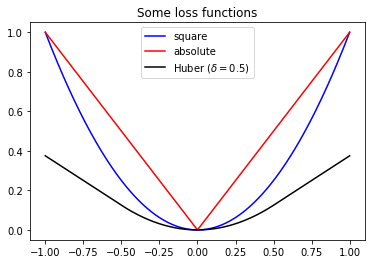

In [3]:
# Plot of the functions defining the three losses
delta = 0.5
grid = np.linspace(-1,1,500)
plt.plot(grid,grid**2,'b-',grid,abs(grid),'r-',grid,Huber(delta,grid),'k-')
plt.legend(labels=['square','absolute','Huber ($\delta={}$)'.format(delta)])
plt.title('Some loss functions')
plt.show()

## Some empirical risk minimizations

One uses the square loss and a hypothesis class of univariate polynomials

In [4]:
# generate the data
np.random.seed(12)  # comment out this line to generate a different dataset
m = 15
x = np.random.uniform(-1,1,m)
x.sort()
x[0] = -1
x[-1] = 1
y = abs(x) + np.random.normal(0,1,m)

Using polynomials of low degree leads to underfitting

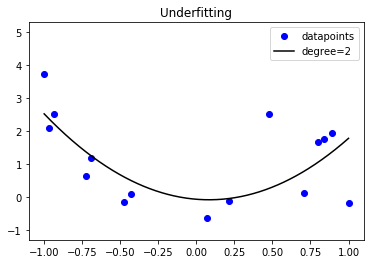

In [5]:
deg = 2
coefs = np.polyfit(x, y, deg)
p_underfit = np.poly1d(coefs)
grid = np.linspace(-1,1,500)
plt.plot(x,y,'bo',grid,p_underfit(grid),'k-')
plt.legend(labels=['datapoints','degree={}'.format(deg)],loc='best')
plt.title('Underfitting')
plt.axis((-1.1,1.1,-1.3,5.3))  # replace this line by the next one when using a different dataset
#plt.axis((-1,1,-3*max(y),3*max(y)))
plt.show()

Using polynomials of high degree leads to overfitting

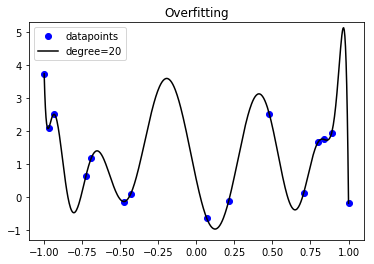

In [6]:
deg = 20
coefs = np.polyfit(x, y, deg)
p_overfit = np.poly1d(coefs)
grid = np.linspace(-1,1,500)
plt.plot(x,y,'bo',grid,p_overfit(grid),'k-')
plt.legend(labels=['datapoints','degree={}'.format(deg)],loc='best')
plt.title('Overfitting')
plt.axis((-1.1,1.1,-1.3,5.3))  # replace this line by the next one when using a different dataset
#plt.axis((-1,1,-3*max(y),3*max(y)))
plt.show()